In [1]:
!pip3 install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('clinic-data.csv', delimiter=',')
df.head()

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 49.4 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 105.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 357.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


,x,y,client_age,clinick_distance,density_area,park_distance,vulnerable_group_density,social_infrastructure_rating
0,52.768865,30.466943,12,1,28,52,3,8
1,55.598649,14.103713,37,1,24,16,8,7
2,61.461549,27.727829,31,3,13,59,3,8
3,51.210678,9.913478,56,1,16,29,6,4
4,62.070864,15.297742,90,3,32,90,9,5


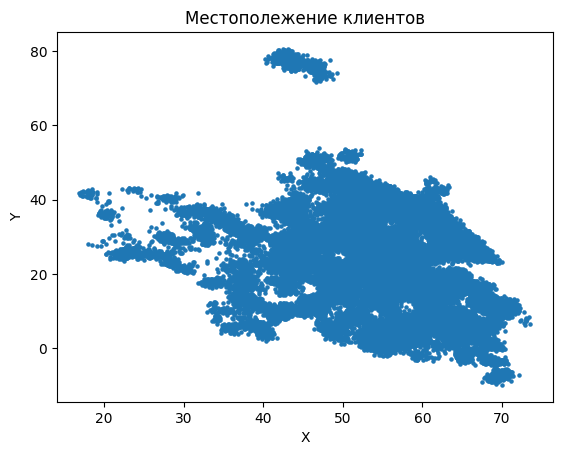

In [3]:
x = list()
y = list()
for x1 in df['x']:
    x.append(x1)
for y1 in df['y']:
    y.append(y1)

# print(x[:5])
# print('\n', y[:5])

plt.scatter(x,y,s=5)
plt.title("Местополежение клиентов")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
#для начала я бы сделал базовую кластеризацию K-means без учета параметров
# Кластеризация медотом K-means
!pip3 install scikit-learn
!pip3 install numpy
import numpy as np
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


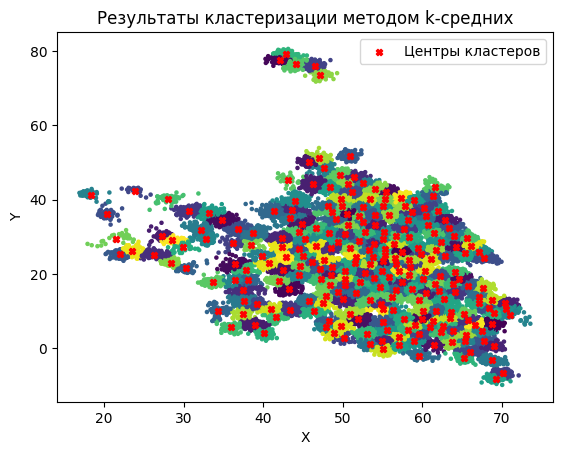

In [5]:
data = df[['x','y']].values
kmeans = KMeans(n_clusters=250)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=20, marker='X', label='Центры кластеров')
plt.title("Результаты кластеризации методом k-средних")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [7]:
#сохраню самый базовый результат с методом Kmeans без учета дополнительных факторов(транспорт рядом/время до клиники и тд)
np.savetxt("poor_result.csv", centroids, delimiter=",", fmt='%f', header='X,Y')

In [8]:
with open('poor_result1.txt', 'w') as f_res:
    for i in centroids:
        f_res.write(f'{str(i[0])} {str(i[1])}\n')

In [6]:
#посчитаю метрики для данного результата
#Total Travel Time
# data - x y клиента
# centroids - x y клиники
# for d in data:
#     min_lenth = 10**10
#     for c in centroids:

diff = data[:, None, :] - centroids[None, :, :] #broadcasting
dist = np.linalg.norm(diff, axis=2) #евклидово растояние
# min_dist = dist.min(axis=1)
nearest_building_idx = dist.argmin(axis=1) 

In [16]:
a = 0.05
b = 0.02

cost = a * dist + b * dist**2
min_cost_per_client = cost.min(axis=1)
ttt = min_cost_per_client.sum()
print(ttt)

2374.981793833886


In [18]:
# посчитаю метрику Clinics Overload
K = np.bincount(nearest_building_idx) #фактическое количество клиентов, прикреплённых к клинике
L = 1000 #условный лимит на одну клинику иначе штраф
count_maximum = np.maximum(0, K-L)
CO = max(count_maximum)
print(CO)

0
